# Author: Xinyang Gao

# NBA data

All the data are collected from

https://sites.google.com/site/rodswebpages/codes

https://www.census.gov/data/tables/time-series/demo/income-poverty/historical-income-households.html

https://www2.census.gov/programs-surveys/popest/datasets/

https://www.basketball-reference.com/leagues/NBA_wins.html

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import geopandas as gpd

# LoadData

In [2]:
path = '/Users/nick0o0o0/Library/Mobile Documents/com~apple~CloudDocs/gxyfile/third_year/ECO353/Assignment/project1/data/'

NBA_attend = pd.read_excel(path + 'NBA Attend Index.xls') # Attendance Data
NBA_revenue = pd.read_csv(path+ 'Finance.csv') #Fiance Data collected by me from https://www2.census.gov/programs-surveys/popest/datasets/

In [3]:
# Create new indicate for year
NBA_revenue['Team'] = NBA_revenue['Team'].str.title()
NBA_revenue['Year2'] = NBA_revenue['Year'].str[:4]

In [4]:
NBA_revenue.head(8)

,Year,Rank,Team,GateRevenue,OtherRevenue,TotalRevenues,PlayerExpenses,OtherExpenses,TotalExpenses,Operatingincome,Year2
0,2000-2001,NaN,Los Angeles Lakers,NaN,NaN,144.0,65.1,47.8,NaN,31.1,2000
1,2000-2001,NaN,New York Knicks,NaN,NaN,157.0,81.6,46.9,NaN,28.5,2000
2,2000-2001,NaN,Chicago Bulls,NaN,NaN,117.0,32.7,32.6,NaN,51.7,2000
3,2000-2001,NaN,Portland Trail Blazers,NaN,NaN,101.0,89.5,30.8,NaN,-19.3,2000
4,2000-2001,NaN,Philadelphia 76Ers,NaN,NaN,103.0,53.6,38.3,NaN,11.1,2000
5,2000-2001,NaN,Phoenix Suns,NaN,NaN,102.0,45.5,31.3,NaN,25.2,2000
6,2000-2001,NaN,Miami Heat,NaN,NaN,99.0,66.9,30.8,NaN,1.3,2000
7,2000-2001,NaN,Houston Rockets,NaN,NaN,81.0,52.3,24.9,NaN,3.8,2000


## Mannuly fix some Team Name error

In [5]:
# Correct some of the Team Name
team_name_dict = {
    'Atlanta': 'Atlanta Hawks',
    'Boston': 'Boston Celtics',
    'Brooklyn Nets': 'Brooklyn Nets',
    'Charlotte': 'Charlotte Hornets',
    'Charlotte Bobcats': 'Charlotte Hornets',
    'Chicago': 'Chicago Bulls',
    'Cleveland': 'Cleveland Cavaliers',
    'Dallas': 'Dallas Mavericks',
    'Dallas Mavericks/': 'Dallas Mavericks',
    'Denver': 'Denver Nuggets',
    'Detroit': 'Detroit Pistons',
    'Golden State': 'Golden State Warriors',
    'Houston': 'Houston Rockets',
    'Indiana': 'Indiana Pacers',
    'Los Angeles Clippers': 'Los Angeles Clippers',
    'Los Angeles Lakers': 'Los Angeles Lakers',
    'Memphis': 'Memphis Grizzlies',
    'Miami': 'Miami Heat',
    'Milwaukee': 'Milwaukee Bucks',
    'Minnesota': 'Minnesota Timberwolves',
    'New Jersey': 'Brooklyn Nets',
    'New Jersey Nets': 'Brooklyn Nets',
    'New Orleans': 'New Orleans Pelicans',
    'New Orleans Hornets': 'New Orleans Pelicans',
    'New Orleans Pelicans': 'New Orleans Pelicans',
    'New York': 'New York Knicks',
    'Oklahoma City': 'Oklahoma City Thunder',
    'Orlando': 'Orlando Magic',
    'Philadelphia': 'Philadelphia 76ers',
    'Philadelphia 76Ers': 'Philadelphia 76ers',
    'Phoenix': 'Phoenix Suns',
    'Portland': 'Portland Trail Blazers',
    'Sacramento': 'Sacramento Kings',
    'San Antonio': 'San Antonio Spurs',
    'Seattle Supersonics': 'Oklahoma City Thunder',
    'Toronto': 'Toronto Raptors',
    'Utah': 'Utah Jazz',
    'Vancouver Grizzlies': 'Memphis Grizzlies',
    'Washington': 'Washington Wizards',
    'Washington Wizards': 'Washington Wizards'
}

# apply the mapping to the 'Team' column of your dataframe
NBA_revenue['Team'] = NBA_revenue['Team'].apply(lambda x: team_name_dict.get(x, x))

In [6]:
# Create column indicate the city of each team
team_city_dict = {'Atlanta Hawks': 'Atlanta city',
    'Boston Celtics': 'Boston city',
    'Brooklyn Nets': 'Brooklyn city',
    'Charlotte Hornets': 'Charlotte city',
    'Chicago Bulls': 'Chicago city',
    'Cleveland Cavaliers': 'Cleveland city',
    'Dallas Mavericks': 'Dallas city',
    'Denver Nuggets': 'Denver city',
    'Detroit Pistons': 'Detroit city',
    'Golden State Warriors': 'San Francisco city',
    'Houston Rockets': 'Houston city',
    'Indiana Pacers': 'Indianapolis city',
    'Los Angeles Clippers': 'Los Angeles city',
    'Los Angeles Lakers': 'Los Angeles city',
    'Memphis Grizzlies': 'Memphis city',
    'Miami Heat': 'Miami city',
    'Milwaukee Bucks': 'Milwaukee city',
    'Minnesota Timberwolves': 'Minneapolis city',
    'New Orleans Pelicans': 'New Orleans city',
    'New York Knicks': 'New York city',
    'Oklahoma City Thunder': 'Oklahoma city',
    'Orlando Magic': 'Orlando city',
    'Philadelphia 76ers': 'Philadelphia city',
    'Phoenix Suns': 'Phoenix city',
    'Portland Trail Blazers': 'Portland city',
    'Sacramento Kings': 'Sacramento city',
    'San Antonio Spurs': 'San Antonio city',
    'Toronto Raptors': 'Toronto city',
    'Utah Jazz': 'Salt Lake city',
    'Washington Wizards': 'Washington city'}

NBA_revenue['City'] = NBA_revenue['Team'].map(team_city_dict)

## Merge with the population Data

In [7]:
# read the population of cites this is from Census
City_pop_00 = pd.read_csv(path + 'Population00-10.csv')
City_pop_10 = pd.read_csv(path + 'Population10-20.csv')

In [8]:
# Merge two data
merged_df = pd.merge(City_pop_00, City_pop_10, on='NAME', how='outer')

In [9]:
merged_df.head(8)

,SUMLEV_x,STATE_x,COUNTY_x,PLACE_x,COUSUB_x,NAME,STNAME_x,ESTIMATESBASE2000,POPESTIMATE2000,POPESTIMATE2001,...,POPESTIMATE2012,POPESTIMATE2013,POPESTIMATE2014,POPESTIMATE2015,POPESTIMATE2016,POPESTIMATE2017,POPESTIMATE2018,POPESTIMATE2019,POPESTIMATE042020,POPESTIMATE2020
0,40.0,1.0,0.0,0.0,0.0,Alabama,Alabama,4447207.0,4452173.0,4467634.0,...,4816632.0,4831586.0,4843737.0,4854803.0,4866824.0,4877989.0,4891628.0,4907965.0,4920706.0,4921532.0
1,162.0,1.0,0.0,124.0,0.0,Abbeville city,Alabama,2989.0,2985.0,2941.0,...,2645.0,2629.0,2610.0,2602.0,2587.0,2578.0,2565.0,2555.0,2555.0,2553.0
2,162.0,1.0,0.0,124.0,0.0,Abbeville city,Alabama,2989.0,2985.0,2941.0,...,2645.0,2629.0,2610.0,2602.0,2587.0,2578.0,2565.0,2555.0,2555.0,2553.0
3,162.0,1.0,0.0,124.0,0.0,Abbeville city,Alabama,2989.0,2985.0,2941.0,...,2925.0,2926.0,2855.0,2922.0,2761.0,2775.0,2787.0,2673.0,2660.0,2656.0
4,162.0,1.0,0.0,124.0,0.0,Abbeville city,Alabama,2989.0,2985.0,2941.0,...,2925.0,2926.0,2855.0,2922.0,2761.0,2775.0,2787.0,2673.0,2660.0,2656.0
5,162.0,1.0,0.0,124.0,0.0,Abbeville city,Alabama,2989.0,2985.0,2941.0,...,12327.0,12383.0,12361.0,12365.0,12372.0,12256.0,12195.0,12061.0,11960.0,11927.0
6,162.0,1.0,0.0,124.0,0.0,Abbeville city,Alabama,2989.0,2985.0,2941.0,...,12327.0,12383.0,12361.0,12365.0,12372.0,12256.0,12195.0,12061.0,11960.0,11927.0
7,162.0,1.0,0.0,124.0,0.0,Abbeville city,Alabama,2989.0,2985.0,2941.0,...,5153.0,5122.0,5100.0,5080.0,5044.0,5027.0,5024.0,5006.0,4976.0,4958.0


In [10]:
# Clean the population data
merged_df = merged_df.rename(columns={'NAME': 'City',
                                      'POPESTIMATE2000': '2000',
                                      'POPESTIMATE2001': '2001',
                                      'POPESTIMATE2002': '2002',
                                      'POPESTIMATE2003': '2003',
                                      'POPESTIMATE2004': '2004',
                                      'POPESTIMATE2005': '2005',
                                      'POPESTIMATE2006': '2006',
                                      'POPESTIMATE2007': '2007',
                                      'POPESTIMATE2008': '2008',
                                      'POPESTIMATE2009': '2009',
                                      'POPESTIMATE2010': '2010',
                                      'POPESTIMATE2011': '2011',
                                      'POPESTIMATE2012': '2012',
                                      'POPESTIMATE2013': '2013',
                                      'POPESTIMATE2014': '2014',
                                      'POPESTIMATE2015': '2015',
                                      'POPESTIMATE2016': '2016',
                                      'POPESTIMATE2017': '2017',
                                      'POPESTIMATE2018': '2018',
                                      'POPESTIMATE2019': '2019',
                                      'POPESTIMATE2020': '2020'})

merged_df = merged_df[['City', '2000', '2001', '2002', '2003', '2004', '2005',
                       '2006', '2007', '2008', '2009', '2010', '2011', '2012',
                       '2013', '2014', '2015', '2016', '2017', '2018', '2019',
                       '2020']]


merged_df = merged_df.melt(id_vars=['City'], var_name='Year2', value_name='CityPopulation')


In [11]:
#Merge Fiancial data with population
result_df = pd.merge(NBA_revenue, merged_df, on=['City', 'Year2'], how='left')

In [12]:
result_df = result_df.sort_values('CityPopulation', ascending=False).groupby(['Year', 'Team']).first().reset_index()

In [13]:
result_df.head(8)

,Year,Team,Rank,GateRevenue,OtherRevenue,TotalRevenues,PlayerExpenses,OtherExpenses,TotalExpenses,Operatingincome,Year2,City,CityPopulation
0,2000-2001,Atlanta Hawks,NaN,NaN,NaN,76.0,42.2,28.0,NaN,5.8,2000,Atlanta city,417534.0
1,2000-2001,Boston Celtics,NaN,NaN,NaN,81.0,49.5,21.7,NaN,9.8,2000,Boston city,591844.0
2,2000-2001,Brooklyn Nets,NaN,NaN,NaN,73.0,59.7,24.6,NaN,-11.3,2000,Brooklyn city,11513.0
3,2000-2001,Charlotte Hornets,NaN,NaN,NaN,65.0,49.4,16.1,NaN,-0.5,2000,Charlotte city,577676.0
4,2000-2001,Chicago Bulls,NaN,NaN,NaN,117.0,32.7,32.6,NaN,51.7,2000,Chicago city,2891582.0
5,2000-2001,Cleveland Cavaliers,NaN,NaN,NaN,75.0,47.8,20.1,NaN,7.1,2000,Cleveland city,475755.0
6,2000-2001,Dallas Mavericks,NaN,NaN,NaN,68.0,59.9,31.5,NaN,-23.4,2000,Dallas city,1188168.0
7,2000-2001,Denver Nuggets,NaN,NaN,NaN,72.0,54.8,24.8,NaN,-7.6,2000,Denver city,555651.0


## Merge with the Attdance Data

In [14]:
#Clean the attendance data
NBA_attend_melt = NBA_attend.melt(id_vars=['Team'], var_name='Year', value_name='Attendance')

In [15]:
NBA_attend_melt['Year2'] = NBA_attend_melt['Year'].str[:4]

In [16]:
NBA_attend_melt.dropna(inplace=True)
NBA_attend_melt = NBA_attend_melt[['Team', 'Year2', 'Attendance']]

In [17]:
NBA_attend_melt.head(8)

,Team,Year2,Attendance
1,Atlanta Hawks,2000,560324.0
3,Boston Celtics,2000,629201.0
6,Charlotte Hornets,2000,615424.0
7,Chicago Bulls,2000,888654.0
9,Cleveland Cavaliers,2000,650775.0
10,Dallas Mavericks,2000,680138.0
11,Denver Nuggets,2000,619300.0
12,Detroit Pistons,2000,607323.0


In [18]:
pop_att_merged = result_df.merge(NBA_attend_melt, on=['Team', 'Year2'], how='left')

## Merge with the Stata Median Income Data

In [19]:
state_dict = {'Atlanta city': 'Georgia',
              'Boston city': 'Massachusetts',
              'Brooklyn city': 'New York',
              'Charlotte city': 'North Carolina',
              'Chicago city': 'Illinois',
              'Cleveland city': 'Ohio',
              'Dallas city': 'Texas',
              'Denver city': 'Colorado',
              'Detroit city': 'Michigan',
              'Houston city': 'Texas',
              'Indianapolis city': 'Indiana',
              'Los Angeles city': 'California',
              'Memphis city': 'Tennessee',
              'Miami city': 'Florida',
              'Milwaukee city': 'Wisconsin',
              'Minneapolis city': 'Minnesota',
              'New Orleans city': 'Louisiana',
              'New York city': 'New York',
              'Oklahoma city': 'Oklahoma',
              'Orlando city': 'Florida',
              'Philadelphia city': 'Pennsylvania',
              'Phoenix city': 'Arizona',
              'Portland city': 'Oregon',
              'Sacramento city': 'California',
              'Salt Lake city': 'Utah',
              'San Antonio city': 'Texas',
              'San Francisco city': 'California',
              'Toronto city': 'Ontario',
              'Washington city': 'District of Columbia'}

# Adding a new column called "State" to the "pop_att_merged" dataframe
pop_att_merged['State'] = pop_att_merged['City'].map(state_dict)

In [20]:
#Read and Clean the Median Income data
Median_Income = pd.read_excel(path + 'h08.xlsx')

In [21]:
Median_Income = Median_Income.melt(id_vars=['State'], var_name='Year2', value_name='StateMedianIncome')

In [22]:
Median_Income.head(8)

,State,Year2,StateMedianIncome
0,United States,2021,70784
1,Alabama,2021,56929
2,Alaska,2021,81133
3,Arizona,2021,70821
4,Arkansas,2021,50784
5,California,2021,81575
6,Colorado,2021,84954
7,Connecticut,2021,80958


In [23]:
Median_Income['State'] = Median_Income['State'].astype(str)
Median_Income['StateMedianIncome'] = Median_Income['StateMedianIncome'].astype(float)
Median_Income['Year2'] = Median_Income['Year2'].astype(str)

In [24]:
pop_att_merged['State'] = pop_att_merged['State'].astype(str)
pop_att_merged['Year2'] = pop_att_merged['Year2'].astype(str)

In [25]:
# Merge the income and all other data
inc_pop_att_merged = pd.merge(pop_att_merged, Median_Income, on=['State', 'Year2'], how='left')

In [26]:
inc_pop_att_merged = inc_pop_att_merged.rename(columns={'StateMedianIncome': 'StateMedianIncome(2021$)'})

In [27]:
Final_Data = inc_pop_att_merged

## Merge with the winning data

In [28]:
#Read the winning data
NBAWin = pd.read_excel(path + 'NBAWinning.xlsx')

In [29]:
NBAWin = NBAWin.melt(id_vars=['Year'], var_name='Team', value_name='WinningTotal')

In [30]:
# create a dictionary of short name to full name mappings
team_names = {'ATL': 'Atlanta Hawks', 'BOS': 'Boston Celtics', 'BRK': 'Brooklyn Nets',
              'CHI': 'Chicago Bulls', 'CHO': 'Charlotte Hornets', 'CLE': 'Cleveland Cavaliers',
              'DAL': 'Dallas Mavericks', 'DEN': 'Denver Nuggets', 'DET': 'Detroit Pistons',
              'GSW': 'Golden State Warriors', 'HOU': 'Houston Rockets', 'IND': 'Indiana Pacers',
              'LAC': 'Los Angeles Clippers', 'LAL': 'Los Angeles Lakers', 'MEM': 'Memphis Grizzlies',
              'MIA': 'Miami Heat', 'MIL': 'Milwaukee Bucks', 'MIN': 'Minnesota Timberwolves',
              'NOP': 'New Orleans Pelicans', 'NYK': 'New York Knicks', 'OKC': 'Oklahoma City Thunder',
              'ORL': 'Orlando Magic', 'PHI': 'Philadelphia 76ers', 'PHO': 'Phoenix Suns',
              'POR': 'Portland Trail Blazers', 'SAC': 'Sacramento Kings', 'SAS': 'San Antonio Spurs',
              'TOR': 'Toronto Raptors', 'UTA': 'Utah Jazz', 'WAS': 'Washington Wizards'}

# replace the short names with the full names
NBAWin['Team'] = NBAWin['Team'].replace(team_names)

In [31]:
NBAWin.rename(columns={'Year': 'Year2'}, inplace=True)

In [32]:
NBAWin['Year2'] = NBAWin['Year2'].astype(str)

In [33]:
Final_Full_data = Final_Data.merge(NBAWin, on=['Team', 'Year2'], how='left')

In [34]:
#Mannully fix the population of Toronto
Final_Full_data.loc[Final_Full_data['City'] == 'Toronto city', 'CityPopulation'] *= 100

In [35]:
Final_Full_data['CityPopulation'] = Final_Full_data['CityPopulation'].divide(1000)
Final_Full_data['StateMedianIncome(2021$)'] = Final_Full_data['StateMedianIncome(2021$)'].divide(1000)
Final_Full_data['Attendance'] = Final_Full_data['Attendance'].divide(1000)

In [36]:
Final_Full_data.rename(columns={'CityPopulation': 'CityPopulation(in thousand)', 
                                'StateMedianIncome(2021$)': 'StateMedianIncome(2021$in thousand)',
                                'Attendance': 'Attendance(in thousand)'
                               }, inplace=True)

In [37]:
Final_Full_data

,Year,Team,Rank,GateRevenue,OtherRevenue,TotalRevenues,PlayerExpenses,OtherExpenses,TotalExpenses,Operatingincome,Year2,City,CityPopulation(in thousand),Attendance(in thousand),State,StateMedianIncome(2021$in thousand),WinningTotal
0,2000-2001,Atlanta Hawks,NaN,NaN,NaN,76.0,42.2,28.0,NaN,5.8,2000,Atlanta city,417.534,560.324,Georgia,41.901,25.0
1,2000-2001,Boston Celtics,NaN,NaN,NaN,81.0,49.5,21.7,NaN,9.8,2000,Boston city,591.844,629.201,Massachusetts,46.753,36.0
2,2000-2001,Brooklyn Nets,NaN,NaN,NaN,73.0,59.7,24.6,NaN,-11.3,2000,Brooklyn city,11.513,NaN,New York,40.744,26.0
3,2000-2001,Charlotte Hornets,NaN,NaN,NaN,65.0,49.4,16.1,NaN,-0.5,2000,Charlotte city,577.676,615.424,North Carolina,38.317,46.0
4,2000-2001,Chicago Bulls,NaN,NaN,NaN,117.0,32.7,32.6,NaN,51.7,2000,Chicago city,2891.582,888.654,Illinois,46.064,15.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
621,2020-2021,Sacramento Kings,18.0,60.0,219.0,279.0,141.0,109.0,250.0,29.0,2020,Sacramento city,512.838,NaN,California,77.652,31.0
622,2020-2021,San Antonio Spurs,20.0,69.0,237.0,306.0,118.0,89.0,207.0,99.0,2020,San Antonio city,1567.118,NaN,Texas,68.404,33.0
623,2020-2021,Toronto Raptors,11.0,55.0,244.0,299.0,137.0,76.0,213.0,86.0,2020,Toronto city,490.200,NaN,Ontario,NaN,27.0
624,2020-2021,Utah Jazz,19.0,68.0,240.0,308.0,151.0,99.0,250.0,58.0,2020,Salt Lake city,NaN,NaN,Utah,83.993,52.0


In [38]:
Final_Full_data.to_excel('NBATeamData.xlsx')

In [39]:
Final_Full_data.to_csv('NBATeamData.csv')

In [40]:
Final_Full_data.columns

Index(['Year', 'Team', 'Rank', 'GateRevenue', 'OtherRevenue', 'TotalRevenues',
       'PlayerExpenses', 'OtherExpenses', 'TotalExpenses', 'Operatingincome',
       'Year2', 'City', 'CityPopulation(in thousand)',
       'Attendance(in thousand)', 'State',
       'StateMedianIncome(2021$in thousand)', 'WinningTotal'],
      dtype='object')

In [41]:
GS_Warrior1 = Final_Full_data.set_index(['Team', 'Year']).loc['Golden State Warriors', :][['GateRevenue', 
                                                                            'OtherRevenue', 
                                                                            'TotalRevenues',
                                                                            'PlayerExpenses', 
                                                                            'OtherExpenses', 
                                                                            'TotalExpenses', 
                                                                            'Operatingincome',
                                                                            'WinningTotal']]

In [42]:
GS_Warrior2 = Final_Full_data.set_index(['Team', 'Year']).loc['Golden State Warriors', :][['CityPopulation(in thousand)', 
                                                                            'Attendance(in thousand)', 
                                                                            'State',
                                                                            'City',
                                                                            'StateMedianIncome(2021$in thousand)', 
                                                                            'WinningTotal',
                                                                            'Year2']]

In [43]:
GS_Warrior = Final_Full_data.set_index(['Team', 'Year']).loc['Golden State Warriors', :]

In [51]:
GS_Warrior1

,GateRevenue,OtherRevenue,TotalRevenues,PlayerExpenses,OtherExpenses,TotalExpenses,Operatingincome,WinningTotal
Year,,,,,,,,
2000-2001,NaN,NaN,69.0,44.9,21.2,NaN,2.9,17.0
2001-2002,NaN,NaN,71.0,47.7,23.9,NaN,-0.6,21.0
2002-2003,23.0,47.0,70.0,51.0,11.2,62.2,7.8,38.0
2003-2004,24.0,52.0,76.0,56.0,11.9,NaN,8.1,37.0
2004-2005,25.0,56.0,81.0,58.0,26.1,84.1,-3.1,34.0
2005-2006,30.0,59.0,89.0,61.0,21.7,82.7,6.3,34.0
2006-2007,39.0,64.0,103.0,69.0,32.7,101.7,1.3,42.0
2007-2008,44.0,68.0,112.0,65.0,32.8,97.8,14.2,48.0
2008-2009,45.0,68.0,113.0,70.0,31.1,NaN,11.9,29.0


In [52]:
GS_Warrior2

,Year,CityPopulation(in thousand),Attendance(in thousand),State,City,StateMedianIncome(2021$in thousand),WinningTotal
Year2,,,,,,,
2000,2000-2001,777.885,591.981,California,San Francisco city,46.816,17.0
2001,2001-2002,780.865,593.182,California,San Francisco city,47.262,21.0
2002,2002-2003,772.723,634.935,California,San Francisco city,47.437,38.0
2003,2003-2004,766.160,645.817,California,San Francisco city,49.300,37.0
2004,2004-2005,761.325,670.368,California,San Francisco city,49.222,34.0
2005,2005-2006,763.016,730.928,California,San Francisco city,51.755,34.0
2006,2006-2007,768.650,742.267,California,San Francisco city,55.319,42.0
2007,2007-2008,778.673,804.864,California,San Francisco city,55.734,48.0
2008,2008-2009,791.152,776.660,California,San Francisco city,57.014,29.0


Text(0.5, 1.0, 'Revenue and Expense for Golden State Warriors')

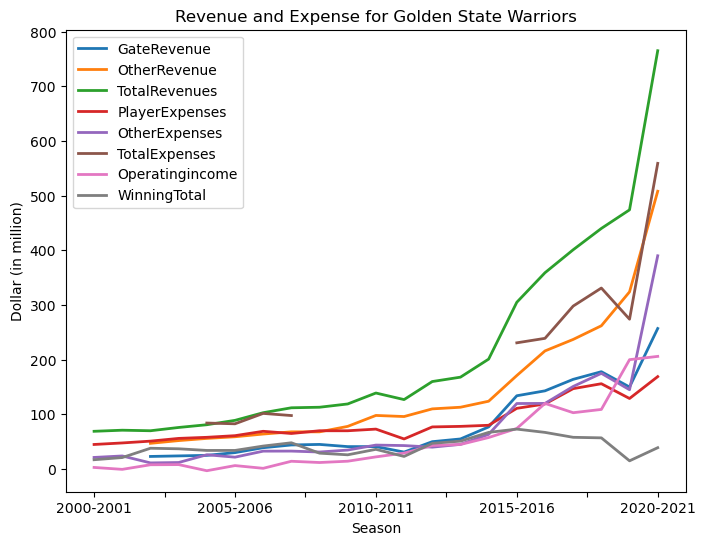

In [46]:
fig, ax = plt.subplots(1, 1, figsize=(8, 6))

GS_Warrior1.plot(ax=ax, linewidth=2)
ax.set_xlabel('Season')
ax.set_ylabel('Dollar (in million)')
ax.set_title('Revenue and Expense for Golden State Warriors')

Text(0.5, 1.0, 'Winning Total \n for Golden State Warriors')

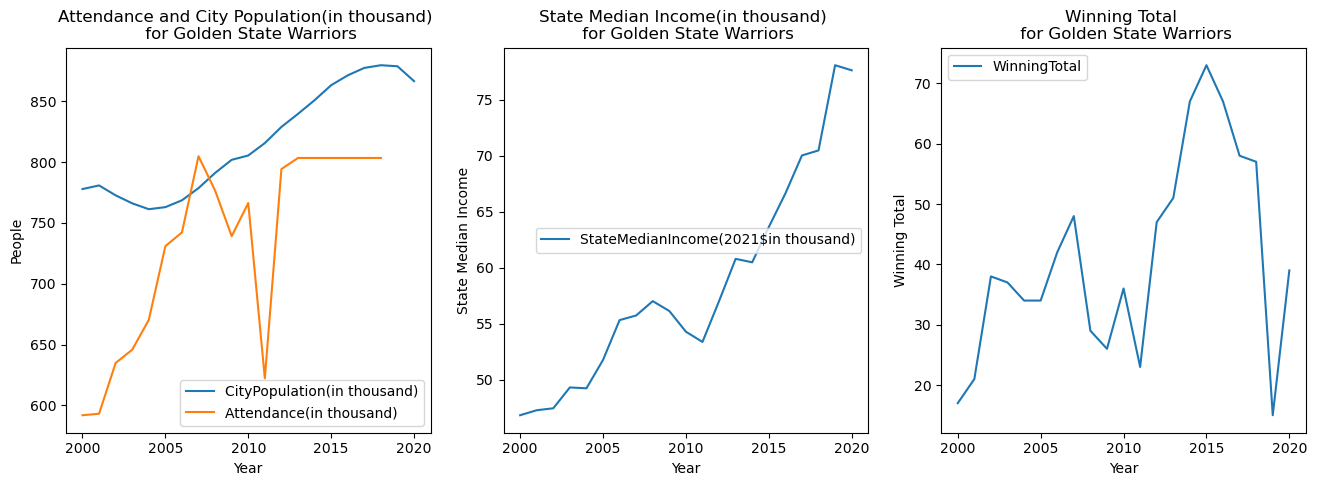

In [47]:
fig, ax = plt.subplots(1, 3, figsize=(16, 5))
GS_Warrior2.reset_index(inplace=True)
GS_Warrior2.set_index('Year2', inplace=True)

GS_Warrior2[['CityPopulation(in thousand)', 'Attendance(in thousand)']].plot(ax=ax[0],)
ax[0].set_xlabel('Year')
ax[0].set_ylabel('People')
ax[0].set_title('Attendance and City Population(in thousand) \n for Golden State Warriors')

GS_Warrior2[['StateMedianIncome(2021$in thousand)']].plot(ax=ax[1],)
ax[1].set_xlabel('Year')
ax[1].set_ylabel('State Median Income')
ax[1].set_title('State Median Income(in thousand) \n for Golden State Warriors')

GS_Warrior2[['WinningTotal']].plot(ax=ax[2],)
ax[2].set_xlabel('Year')
ax[2].set_ylabel('Winning Total')
ax[2].set_title('Winning Total \n for Golden State Warriors')

Text(0.5, 1.0, 'Operating Income versus Player Expenses\n for NBA (past 2000-2020 data)')

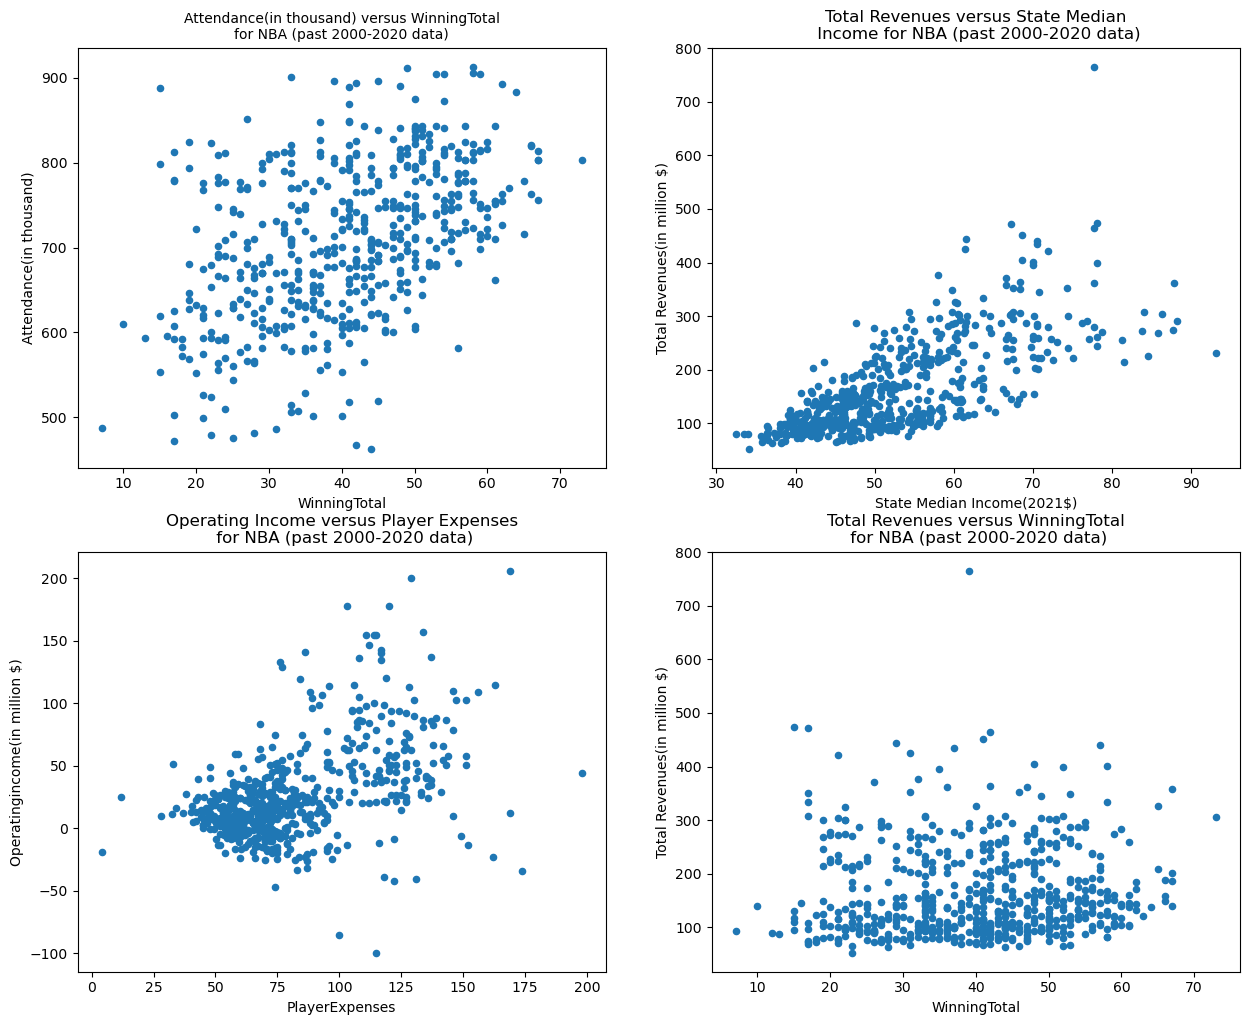

In [50]:
fig, ax = plt.subplots(2, 2, figsize=(15, 12))

x='WinningTotal'
y='Attendance(in thousand)'

Final_Full_data.plot(ax=ax[0,0], kind='scatter', x=x, y=y)
ax[0,0].set_xlabel(x)
ax[0,0].set_ylabel(y)
ax[0,0].set_title(y + ' versus ' + x + '\nfor NBA (past 2000-2020 data)', fontsize=10)

Final_Full_data.plot(ax=ax[0,1], kind='scatter', x='StateMedianIncome(2021$in thousand)', y='TotalRevenues')
ax[0,1].set_xlabel('State Median Income(2021$)')
ax[0,1].set_ylabel('Total Revenues(in million $)')
ax[0,1].set_title('Total Revenues versus State Median\n Income for NBA (past 2000-2020 data)')

Final_Full_data.plot(ax=ax[1,1], kind='scatter', x='WinningTotal', y='TotalRevenues')
ax[1,1].set_xlabel('WinningTotal')
ax[1,1].set_ylabel('Total Revenues(in million $)')
ax[1,1].set_title('Total Revenues versus WinningTotal\n for NBA (past 2000-2020 data)')

Final_Full_data.plot(ax=ax[1,0], kind='scatter', x='PlayerExpenses', y='Operatingincome')
ax[1,0].set_xlabel('PlayerExpenses')
ax[1,0].set_ylabel('Operatingincome(in million $)')
ax[1,0].set_title('Operating Income versus Player Expenses\n for NBA (past 2000-2020 data)')